This notebook introduces the fundamental objects of `MDAnalysis`: the `Universe`, `AtomGroup`, and `Atom` objects. It also introduces the selection language, and the basics of reading and slicing trajectories.

# 1. Fundamental objects

## `Universes` and `AtomGroups`

> "If you wish to make an apple pie from scratch, you must first invent the Universe." 

> ~ Carl Sagan

One of the fundamental objects in the `MDAnalysis` data model is the `Universe` object. This contains all of a simulations' topology information at the least, but usually also includes trajectory information as well. A `Universe` can be thought of as an interface to the raw details of a simulation.

First, we need to import `MDAnalysis`, giving us access to all the components in its namespace:

In [1]:
import MDAnalysis as mda

In order to do anything, we do need some actual molecular dynamics data to work with. You should have downloaded a set of datafiles for this workshop; I placed mine in the following location relative to this notebook:

In [2]:
datapath = '../../sandbox/'

To make a Universe, we need at the very least a topology file. We'll use one for a simulation system that includes adenylate kinase with the water removed:

In [9]:
import os
top = os.path.join(datapath, 'equilibrium/adk4AKE.psf')

In [10]:
u = mda.Universe(top)

In [12]:
print u

<Universe with 3341 atoms and 3365 bonds>


We now have a `Universe` object. Since the PSF file we loaded contained both atom identities and bond information, the `Universe` is able to access these details.

We can access all atoms in the `Universe` through the `Universe.atoms` attribute. This gives access to many details, including basic topology details for each atom.

In [37]:
u.atoms.indices

array([   0,    1,    2, ..., 3338, 3339, 3340])

In [35]:
u.atoms.names

array(['N', 'HT1', 'HT2', ..., 'CA', 'HA1', 'HA2'], 
      dtype='|S4')

In [38]:
u.atoms.resnames

array(['MET', 'MET', 'MET', ..., 'GLY', 'GLY', 'GLY'], 
      dtype='|S3')

In [47]:
u.atoms.resids

array([  1,   1,   1, ..., 214, 214, 214])

In [41]:
u.atoms.charges

array([-0.3 ,  0.33,  0.33, ..., -0.02,  0.09,  0.09])

In [43]:
u.atoms.masses

array([ 14.007,   1.008,   1.008, ...,  12.011,   1.008,   1.008])

In [46]:
u.atoms.types

array(['NH3', 'HC', 'HC', ..., 'CT2', 'HB', 'HB'], 
      dtype='|S4')

These are all methods of an `AtomGroup`, of which `Universe.atoms` is one such instance.

In [48]:
type(u.atoms)

MDAnalysis.core.AtomGroup.AtomGroup

Many of the methods of an `AtomGroup` return numpy arrays of the same length as the `AtomGroup` itself; that is, each element corresponds to each atom in the `AtomGroup`, in order. That means that if we want only, say, the masses of the 3rd through the 11th atom in our topology, we could simply slice like so:

In [51]:
u.atoms.masses[2:11]

array([  1.008,   1.008,  12.011,   1.008,  12.011,   1.008,   1.008,
        12.011,   1.008])

**Note**: `AtomGroup` indexes are 0-based, even if the topology file gives the atoms 1-based indices. This is for consistency with the rest of the Python ecosystem, including `numpy`. 

But `AtomGroup`s themselves are actually sliceable, so we could instead do:

In [52]:
u.atoms[2:11].masses

array([  1.008,   1.008,  12.011,   1.008,  12.011,   1.008,   1.008,
        12.011,   1.008])

to achieve the same effect. Slicing of an `AtomGroup` returns an `AtomGroup` containing the atoms in the slice, so this gives a basic way of accessing a subset of the atoms present in the topology.

Fancy indexing also works. We can, for example, get an `AtomGroup` containing the 3rd, 22nd, 3rd, and second-to-last atom in the `Universe` with something like:

In [62]:
ag = u.atoms[[2, 21, 2, -2]]

In [65]:
ag.indices

array([   2,   21,    2, 3339])

We can also use expressions that return boolean arrays to select out atoms of interest. We can, for exmple, get an `AtomGroup` of all atoms in the system with mass less than 10 u with:

In [53]:
u.atoms[u.atoms.masses < 10]

<AtomGroup with 1685 atoms>

We can string together boolean expressions to obtain even more granular selections, for example getting all atoms with mass less than 10 u AND within an arginine residue:

In [67]:
u.atoms[(u.atoms.masses < 10) & (u.atoms.resnames == 'ARG')]

<AtomGroup with 169 atoms>

All topology properties of an `AtomGroup` can be harnessed in this way to make complex subselections.

## Working with individual atoms

We can also work with individual atoms, though in practice this is rare, and in the future will be very inefficient when operating on multiple atoms compared to operating on a whole `AtomGroup`.

In [110]:
a = u.atoms[0]

In [118]:
a

<Atom 1: N of type NH3 of resname MET, resid 1 and segid ADK>

In [121]:
print "name:", a.name
print "resid:", a.resid
print "resname:", a.resname

name: N
resid: 1
resname: MET


## Coordinates, bonds, angles, and dihedrals

`AtomGroups` are more interesting with coordinate data attached to them. Our topology file has none of this, so using

In [94]:
u.atoms.positions

AttributeError: 'AtomGroup' object has no attribute 'positions'

yields an `AttributeError`. Let's load some coordinates by creating a new Universe, but with a topology + a trajectory.

In [95]:
traj = os.path.join(datapath, 'equilibrium', '1ake_007-nowater-core-dt240ps.dcd')

In [97]:
u = mda.Universe(top, traj)

Now this will work.

In [100]:
u.atoms.positions

array([[  2.87066364,  10.60445595,   9.75028801],
       [  3.10920501,  11.32470894,   9.0389967 ],
       [  3.74609542,  10.24300766,  10.17991066],
       ..., 
       [ -7.49935293,  10.89219856,  12.33476448],
       [ -6.59658432,  10.83427048,  12.92472839],
       [ -8.34826946,  10.59926796,  12.93470669]], dtype=float32)

We can also get at connectivity information between atoms, such as bonds, angles, and dihedrals.

In [125]:
u.bonds

<TopologyGroup containing 3365 Bonds>

In [126]:
u.angles

<TopologyGroup containing 6123 Angles>

In [127]:
u.dihedrals

<TopologyGroup containing 8921 Dihedrals>

These work the same way as `AtomGroup`s. They're sliceable, and indexing them works too to give individual bonds, angles, dihedrals.

In [131]:
u.bonds[3]

<Bond between: Atom 1 (N of MET 1 None) and Atom 5 (CA of MET1 None), length 1.49 A>

Want the actual value?

In [138]:
u.bonds[3].value()

1.4905602

Want all bonds less than 1 Å? 

In [152]:
u.bonds[u.bonds.values() < 1.0].types()

[('OH1', 'H'), ('NH1', 'H'), ('NC2', 'HC'), ('NR1', 'H'), ('NH2', 'H')]

## `ResidueGroups` and `SegmentGroups`

The `Universe` also gives higher-order topology objects, including `ResidueGroups` and `SegmentGroups`. We can access all residues in the `Universe` with:

In [155]:
u.residues

<ResidueGroup [<Residue MET, 1>, <Residue ARG, 2>, <Residue ILE, 3>, <Residue ILE, 4>, <Residue LEU, 5>, <Residue LEU, 6>, <Residue GLY, 7>, <Residue ALA, 8>, <Residue PRO, 9>, <Residue GLY, 10>, <Residue ALA, 11>, <Residue GLY, 12>, <Residue LYS, 13>, <Residue GLY, 14>, <Residue THR, 15>, <Residue GLN, 16>, <Residue ALA, 17>, <Residue GLN, 18>, <Residue PHE, 19>, <Residue ILE, 20>, <Residue MET, 21>, <Residue GLU, 22>, <Residue LYS, 23>, <Residue TYR, 24>, <Residue GLY, 25>, <Residue ILE, 26>, <Residue PRO, 27>, <Residue GLN, 28>, <Residue ILE, 29>, <Residue SER, 30>, <Residue THR, 31>, <Residue GLY, 32>, <Residue ASP, 33>, <Residue MET, 34>, <Residue LEU, 35>, <Residue ARG, 36>, <Residue ALA, 37>, <Residue ALA, 38>, <Residue VAL, 39>, <Residue LYS, 40>, <Residue SER, 41>, <Residue GLY, 42>, <Residue SER, 43>, <Residue GLU, 44>, <Residue LEU, 45>, <Residue GLY, 46>, <Residue LYS, 47>, <Residue GLN, 48>, <Residue ALA, 49>, <Residue LYS, 50>, <Residue ASP, 51>, <Residue ILE, 52>, <Resid

And all segments with:

In [156]:
u.segments

<SegmentGroup [<Segment ADK>]>

`ResidueGroups` and `SegmentGroups` also behave like `AtomGroups`, with many of their methods returning `numpy` arrays with each element corresponding to a single residue or segment, respectively.

In [159]:
u.residues.resnames

array(['MET', 'ARG', 'ILE', 'ILE', 'LEU', 'LEU', 'GLY', 'ALA', 'PRO',
       'GLY', 'ALA', 'GLY', 'LYS', 'GLY', 'THR', 'GLN', 'ALA', 'GLN',
       'PHE', 'ILE', 'MET', 'GLU', 'LYS', 'TYR', 'GLY', 'ILE', 'PRO',
       'GLN', 'ILE', 'SER', 'THR', 'GLY', 'ASP', 'MET', 'LEU', 'ARG',
       'ALA', 'ALA', 'VAL', 'LYS', 'SER', 'GLY', 'SER', 'GLU', 'LEU',
       'GLY', 'LYS', 'GLN', 'ALA', 'LYS', 'ASP', 'ILE', 'MET', 'ASP',
       'ALA', 'GLY', 'LYS', 'LEU', 'VAL', 'THR', 'ASP', 'GLU', 'LEU',
       'VAL', 'ILE', 'ALA', 'LEU', 'VAL', 'LYS', 'GLU', 'ARG', 'ILE',
       'ALA', 'GLN', 'GLU', 'ASP', 'CYS', 'ARG', 'ASN', 'GLY', 'PHE',
       'LEU', 'LEU', 'ASP', 'GLY', 'PHE', 'PRO', 'ARG', 'THR', 'ILE',
       'PRO', 'GLN', 'ALA', 'ASP', 'ALA', 'MET', 'LYS', 'GLU', 'ALA',
       'GLY', 'ILE', 'ASN', 'VAL', 'ASP', 'TYR', 'VAL', 'LEU', 'GLU',
       'PHE', 'ASP', 'VAL', 'PRO', 'ASP', 'GLU', 'LEU', 'ILE', 'VAL',
       'ASP', 'ARG', 'ILE', 'VAL', 'GLY', 'ARG', 'ARG', 'VAL', 'HSE',
       'ALA', 'PRO',

In [160]:
u.segments.segids

array(['ADK'], 
      dtype='|S3')

## Example: Ramachandran plot of phi and psi angles

In [167]:
res = u.residues[3]

In [169]:
res.phi_selection().names

array(['C', 'N', 'CA', 'C'], 
      dtype='|S2')

In [171]:
res.dihedrals

<TopologyGroup containing 62 Dihedrals>

There doesn't appear to be a simple method for getting phi and psi angles anymore.

# 2. Selecting atoms with selection strings

We've already seen that complex selections can be performed on `AtomGroups` through boolean array indexing. However, `MDAnalysis` also features a CHARMM-style atom selection mechanism that is often more convenient.

## Example: domain angles of AdK

### Domain movement of adenylate kinase (AdK)

AdK has three domains: CORE, NMP, LID. The NMP and LID move relative to the CORE. Movements can be defined by two angles between the two domains, $\theta_{\text{NMP}}$ and $\theta_{\text{LID}}$.

These angles are defined as:
* CORE residues 1-29, 60-121, 160-214 (gray)
* NMP residues 30-59 (blue)
* LID residues 122-159 (yellow)

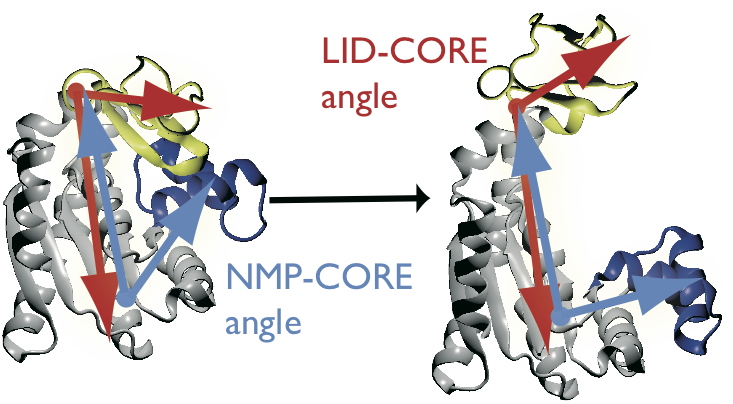

In [4]:
from IPython.core.display import Image

Image("../doc/sphinx/figs/angle_defs.png")

AdK undergoes a conformational transition during which the NMP and LID domain move relative to the CORE domain. The transition can be characterized by the angles between the domains:

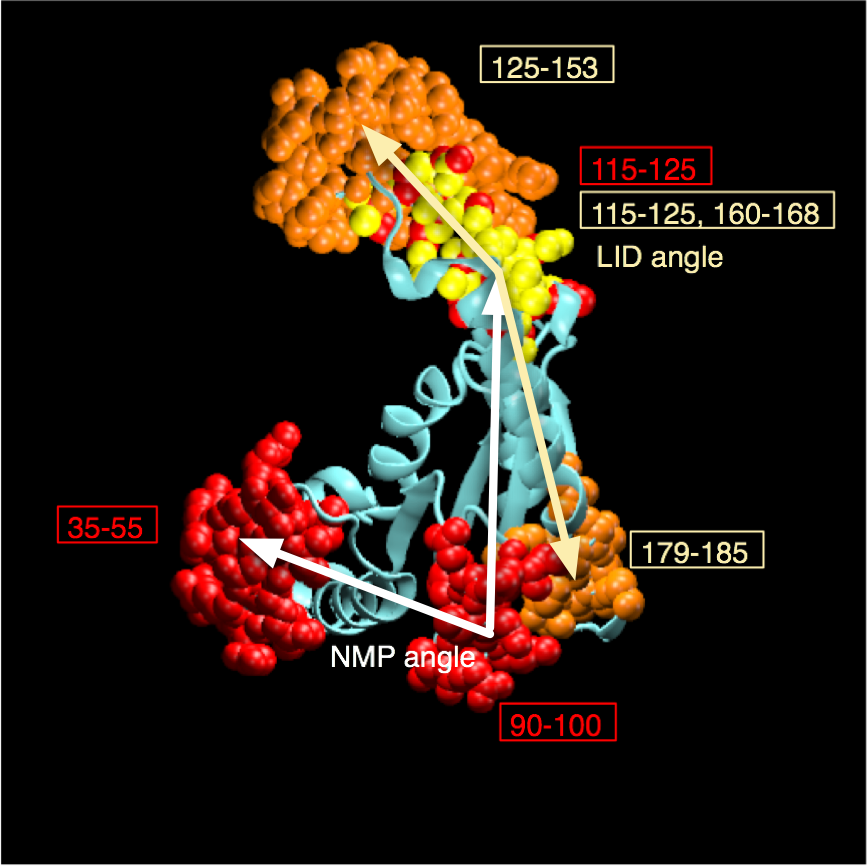

In [12]:
Image("../doc/sphinx/figs/6b_angle_def_open.png", width=500)

For simplicity, define $\theta_{\text{NMP}}$ and $\theta_{\text{LID}}$ between the centers of mass of *backbone* atoms of groups of the following atoms `A`, `B`, `C`:

Definition of $\theta_{\text{NMP}}$

A: 115-125, B: 90-100, C: 35-55

Definition of $\theta_{\text{LID}}$

A: 179-185, B: 115-125, C: 125-153

The angle between vectors $\vec{BA}$ and $\vec{BC}$ is \begin{equation*} \theta = \arccos\left(\frac{\vec{BA}\cdot\vec{BC}}{|\vec{BA}||\vec{BC}|}\right) \end{equation*}

With `numpy`:
```python
np.arccos(np.cdot(BA, BC))/(np.linalg.norm(BA) * np.linalg.norm(BC))
```


Write two functions `theta_NMP()` and `theta_LID()` that calculate these angles, given the universe.

Hint:

In [ ]:
A = u.select_atoms("resid 115:125 and backbone").center_of_geometry()

In [14]:
import numpy as np
from numpy.linalg import norm

def theta_NMP(u):
    """Calculate the NMP-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 115:125 and backbone").center_of_geometry()
    B = u.select_atoms("resid 90:100 and backbone").center_of_geometry()
    A = u.select_atoms("resid 35:55 and backbone").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

def theta_LID(u):
    """Calculate the LID-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 179:185 and backbone").center_of_geometry()
    B = u.select_atoms("resid 115:125 and backbone").center_of_geometry()
    A = u.select_atoms("resid 125:153 and backbone").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

Apply functions...